# DEWA Submission

**Problem 4:** You are provided with two excel files as input and output. You need to find a way to map the
inputs to the respective outputs with minimum possible error. We need to see your code with
results and your problem-solving journey. You may explain which techniques you applied and
the reasons for using the selected technique.


**Solution:**

## Import libraries

In [35]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import exp
import scipy
import matplotlib as pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load input and output files
The input and output datasets are observed to be without headers

In [2]:
inputData = pd.read_excel("data/input.xlsx", header=None)
outputData = pd.read_excel("data/output.xlsx", header=None)

## Exploratory Data Analysis

In [3]:
inputData.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.3857,4.5971,0.14438,18.604,3.7845,342.29,56.62,3.5222,19.843,20.142,...,0.19089,19.954,3.8798,934.90,636.410,4.8922,19.530,18.111,1.47050,73.668
1,4.0224,5.1557,0.49634,16.306,2.5091,186.37,947.34,3.3883,18.557,20.165,...,0.76118,14.977,3.1384,593.65,85.344,3.9828,21.108,18.535,2.26050,83.412
2,4.1854,5.3730,0.14551,18.649,2.7634,281.59,543.41,3.4434,21.681,19.428,...,0.81330,17.778,3.8078,664.12,547.280,2.7157,18.389,21.325,1.57440,60.681
3,4.1088,4.6845,0.69137,19.841,2.4890,853.99,901.33,6.0265,21.009,19.037,...,0.77738,16.843,4.4791,929.19,24.253,5.3745,19.865,20.365,0.67419,85.007
4,4.1219,4.7164,0.33715,17.289,2.4982,915.86,670.69,5.7129,18.732,18.564,...,0.37566,14.136,2.0574,506.78,787.170,5.5722,21.737,21.181,2.95900,35.751


In [4]:
outputData.head()

,0,1,2,3
0,0.0000,0.000,0.0000,0.000
1,18.6440,61.726,1.0434,28.948
2,25.4400,82.240,1.0679,28.966
3,4.9482,32.322,1.0167,15.058
4,4.6428,24.778,1.0250,18.281


The input dataset has 23 columns and the columns are not named. TO start with, it is highly possible that each column is a significant feature. The output dataset has 4 columns which needs to be mapped with the input.

In [5]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21920 entries, 0 to 21919
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21920 non-null  float64
 1   1       21920 non-null  float64
 2   2       21920 non-null  float64
 3   3       21920 non-null  float64
 4   4       21920 non-null  float64
 5   5       21920 non-null  float64
 6   6       21920 non-null  float64
 7   7       21920 non-null  float64
 8   8       21920 non-null  float64
 9   9       21920 non-null  float64
 10  10      21920 non-null  float64
 11  11      21920 non-null  float64
 12  12      21920 non-null  float64
 13  13      21920 non-null  float64
 14  14      21920 non-null  float64
 15  15      21920 non-null  float64
 16  16      21920 non-null  float64
 17  17      21920 non-null  float64
 18  18      21920 non-null  float64
 19  19      21920 non-null  float64
 20  20      21920 non-null  float64
 21  21      21920 non-null  float64
 22

In [6]:
outputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21920 entries, 0 to 21919
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21920 non-null  float64
 1   1       21920 non-null  float64
 2   2       21920 non-null  float64
 3   3       21920 non-null  float64
dtypes: float64(4)
memory usage: 685.1 KB


The dataset has 21920 entries. They have no missing values, and the datatypes are observed to be float.

Let's take a detailed statistical look into the datasets.

In [7]:
inputData.describe().T

,count,mean,std,min,25%,50%,75%,max
0,21920.0,4.300634,0.230699,3.900000,4.099400,4.302550,4.499600,4.69990
1,21920.0,4.902029,0.287952,4.400000,4.655500,4.897200,5.154025,5.40000
2,21920.0,0.500298,0.287002,0.001120,0.253192,0.500745,0.748698,0.99999
3,21920.0,16.978422,1.726132,14.000000,15.479750,16.968000,18.457250,20.00000
4,21920.0,3.239738,1.008162,1.500300,2.363675,3.232900,4.107025,4.99990
5,21920.0,497.885794,287.615145,0.016225,250.097500,499.005000,744.627500,999.94000
6,21920.0,502.899704,288.264060,0.133540,254.590000,504.835000,752.802500,999.99000
7,21920.0,3.980054,1.731341,1.000900,2.474350,3.971600,5.494525,6.99990
8,21920.0,19.990592,1.156723,18.000000,18.984750,20.000000,20.981250,22.00000
9,21920.0,20.004395,1.155588,18.001000,19.013000,19.999000,21.004000,22.00000


Input dataset: 
- The data columns 5, 6, 16, 17 possess a very high standard deviation , next to 11 and 22. All the other columns possess narrow standard deviation. Also, these data columns 5, 6, 16, 17, 11, 22 poss max value greater than 90, whereas their min values are lesser than 10.

- The data columns 3, 8, 9, 14, 19, 20 possess min value between 10 and 20, all the other columns possess min value lesser than 10. Also the data columns 3, 8, 9, 14, 19, 20 possess max value greater than 20 whereas all the other columns possess max value lesser than 10.

In [8]:
outputData.describe().T

,count,mean,std,min,25%,50%,75%,max
0,21920.0,9.838782,6.435896,0.0,4.77065,8.2093,14.24700,26.6940
1,21920.0,40.900478,19.025825,0.0,28.03300,37.2700,52.02025,89.0640
2,21920.0,1.025371,0.208927,0.0,1.02190,1.0355,1.05380,8.9516
3,21920.0,21.394234,7.193564,0.0,15.88700,23.0000,28.16200,29.4860


Output dataset: 
- The data columns 2, 0, 3, 1 are in the order of increasing standard deviation
- All the data columns possess min value 0
- The max values in each column are in the same increasing order of standard deviation

### Visulaizing the dataset

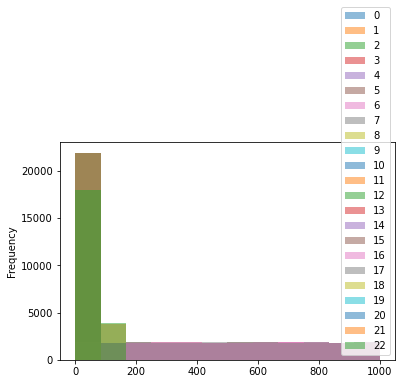

In [9]:
inputData.plot.hist(bins=12, alpha=0.5)

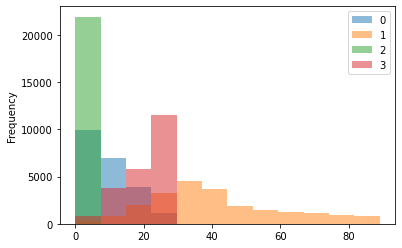

In [10]:
outputData.plot.hist(bins=12, alpha=0.5)

The above plots show the histogram of the input and output dataset respectively. Let's check the input plot for the same min and max range as output.

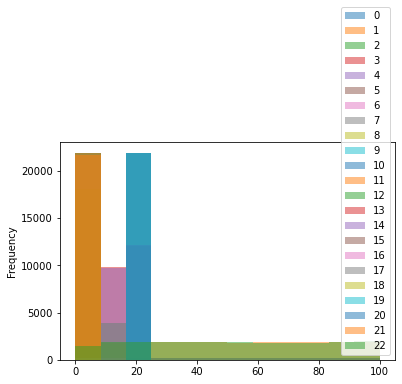

In [11]:
inputData.plot.hist(bins=12, alpha=0.5, range=(0, 100))

Rather than modifying the range in the plot, let's try to pick only the columns which match to output data range. This will be discussed in Feature Engineering section further.

In [ ]:
inputDataHighSD = inputData.loc[:, [5, 6, 16, 17, 11, 22]]
inputDataMidRange = inputData.loc[:, [3, 8, 9, 14, 19, 20]]
inputDataLowRange = inputData.loc[:, [0, 1, 2, 4, 7, 10, 12, 13, 15, 18, 21]]

Let's visualize individual columns of the output datset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFD38FC160>,
      dtype=object)

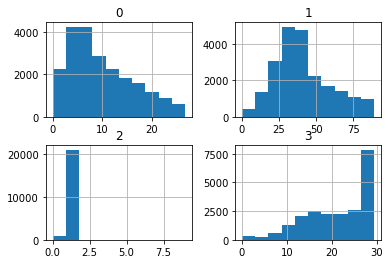

In [12]:
outputData.hist()

Interestingly, it is observed that the column 1 possess a gaussian distribution, columns 0 and 3 posses an exponential distribution and column 2 a log normal distribution. Also, each column seem to emphasize particular range of values. 

## Feature Engineering

Let's revist the input dataset and check for the histogram plot for columns whose max values are lesser than 100.

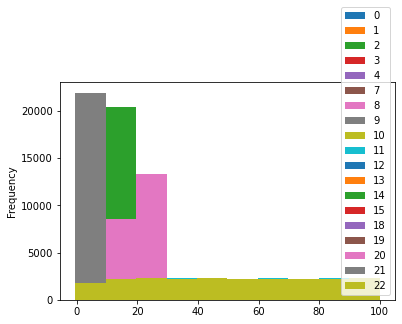

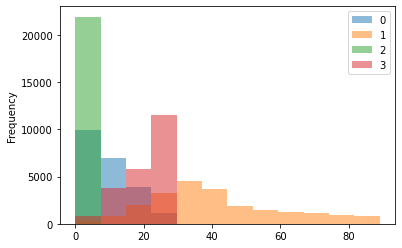

In [13]:
inputDataMax100 = inputData[inputData < 100].dropna(axis=1)
inputDataMax100.plot.hist()
outputData.plot.hist(bins=12, alpha=0.5)

Interestingly, the input data columns 5, 6, 16, 17 which possess a very high standard deviation are not selected for the specified condition. There is a visual resemblance in the histogram plots of above input and output too, i.e, the frequency of the input and output data peaks in the similar ranges (data values between 0 and 30 approximately) and the frequency decays in the higher values of the data > 30. Let's check the distribution graph.

(array([0.05815195, 0.01931177, 0.01452228, 0.00107317, 0.00107484,
        0.00105263, 0.00106242, 0.00106338, 0.00107818, 0.00108702]),
 array([-0.52611 ,  9.526401, 19.578912, 29.631423, 39.683934, 49.736445,
        59.788956, 69.841467, 79.893978, 89.946489, 99.999   ]),
 <a list of 10 Patch objects>)

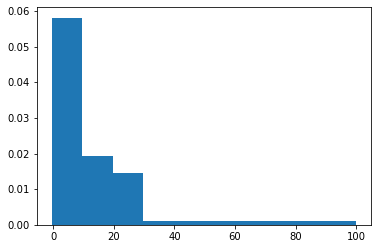

In [14]:
data = inputDataMax100.values.flatten()
mean, var  = scipy.stats.distributions.norm.fit(data)
x = np.linspace(0,5,100)
plt.hist(data, density=True)

(array([0.04522398, 0.01820433, 0.01716836, 0.01610166, 0.00611464,
        0.00283898, 0.00217438, 0.00179149, 0.00139196, 0.00126903]),
 array([ 0.    ,  8.9064, 17.8128, 26.7192, 35.6256, 44.532 , 53.4384,
        62.3448, 71.2512, 80.1576, 89.064 ]),
 <a list of 10 Patch objects>)

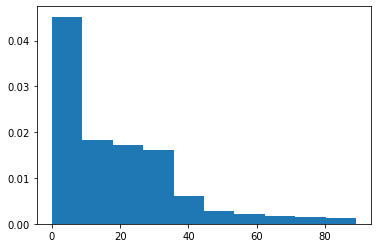

In [15]:
data = outputData.values.flatten()
mean, var  = scipy.stats.distributions.norm.fit(data)
x = np.linspace(0,5,100)
plt.hist(data, density=True)

The distribution graph also exhibits similarity.

Let's see whether we can observe individual distributions on the input dataset similar to the output. 
 - The columns 0 and 3 of output dataset possess exponential distribution: For this, let's take the columns whose values are lesser than 30 (as in output data range for those columns)

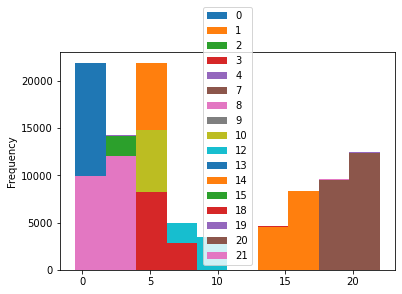

In [16]:
inputDataLessThan30 = inputData[inputData < 30].dropna(axis=1)
inputDataLessThan30.plot.hist()

Because of this condition, the input columns 5, 6, 11, 16, 17, 22 are left out (Again these columns were observed to have high standard deviation). 

(array([0.07776863, 0.08493674, 0.10785514, 0.01252304, 0.00416482,
        0.        , 0.01088737, 0.01981146, 0.06486438, 0.06111771]),
 array([-0.52611 ,  1.726501,  3.979112,  6.231723,  8.484334, 10.736945,
        12.989556, 15.242167, 17.494778, 19.747389, 22.      ]),
 <a list of 10 Patch objects>)

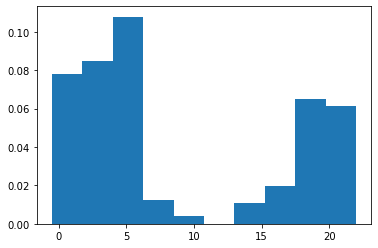

In [17]:
data = inputDataLessThan30.values.flatten()
mean, var  = scipy.stats.distributions.norm.fit(data)
x = np.linspace(0,5,100)
plt.hist(data, density=True)

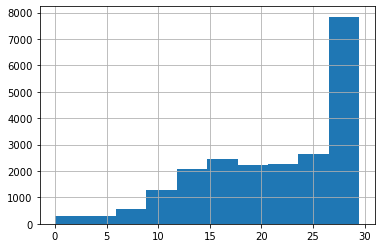

In [18]:
outputData[3].hist()

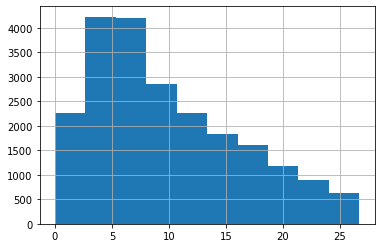

In [19]:
outputData[0].hist()

This distribution plot possess resemblance in terms of the exponentially increasing trend from the x range after 10, and exponentially decreasing trend in x range between 5 and 10. The output column 3 has  exponentialy increasing trend and output column 0 has **smoothened** exponentially decreasing trend as shown below respectively.

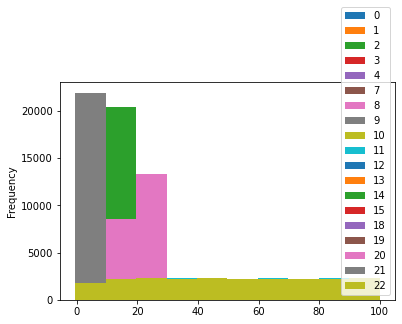

In [20]:
inputDataMax100 = inputData[inputData < 100].dropna(axis=1)
inputDataMax100.plot.hist()

Please observe the frequency in the lower x range from 0 to 2. This is quite similar to the output column 2 as below.

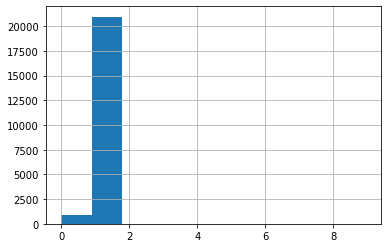

In [21]:
outputData[2].hist()

All these observations gives an insight that the output dataset could be the processed/ transformed data of the input dataset. Also, we saw that the output data showed similar distributions to exponential, gaussian and log norm with emphasis in certain x range. Let's try to map the input dataset to the output through modelling.

## Model tuning for output distribution of the input data

It is observed that the input and output dataset shows a similar distribution of data. It is also observed that input dataset has been transformed to the output based on emphasis in different ranges of data. Let us try to map the input and output.

Based on the observations till now, I decided to go with Dimensionality Reduction Algorithms at first. I used PCA with 4 components.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFD4A5D220>,
      dtype=object)

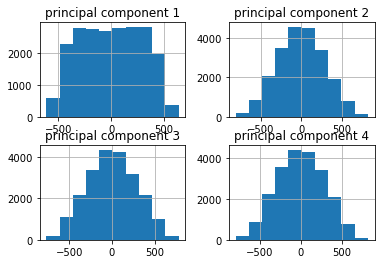

In [42]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(inputData)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2', 
                                        'principal component 3', 'principal component 4'])
principalDf.hist()

In [43]:
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_.cumsum()

[0.25322291 0.24914167 0.24711762 0.24562746]


array([0.25322291, 0.50236458, 0.7494822 , 0.99510966])

This shows that these 4 components together contain 99.5% of information from the input dataset of 23 columns. But the histogram plots do not seem to match with output.

I proceeded to make a conventional polynomial regression model - inorder to see the accuracy of the polynomial fit over the output data. Regression model is chosen because the output dataset is continuous.

In [44]:
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(inputData)
#poly_variables = poly.fit_transform(inputData.loc[:, inputData < 30] )
test = outputData[0]
regression = linear_model.LinearRegression()

model = regression.fit(poly_variables, test)
score = model.score(poly_variables, test)
score

0.9306035661076624

The score for mapping the first ouptut column to input is 0.93

In [46]:
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(inputData )
test = outputData[1]
regression = linear_model.LinearRegression()

model = regression.fit(poly_variables, test)
score = model.score(poly_variables, test)
score

0.8941761347039975

The score for mapping the second ouptut column to input is 0.89

In [47]:
poly = PolynomialFeatures(degree=3)
#poly_variables = poly.fit_transform(inputData.loc[:, inputData.std() < 30] )
poly_variables = poly.fit_transform(inputData)
test = outputData[2]
regression = linear_model.LinearRegression()

model = regression.fit(poly_variables, test)
score = model.score(poly_variables, test)
score

0.21813689056032592

The score for mapping the third ouptut column to input is 0.21

In [48]:
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(inputData )
test = outputData[3]
regression = linear_model.LinearRegression()

model = regression.fit(poly_variables, test)
score = model.score(poly_variables, test)
score

0.881816248632874

The score for mapping the fourth ouptut column to input is 0.88

## Discussion based on the results

All the above observations give an insight that the output dataset could be the processed/ transformed data of the input dataset. Also, we could visualize that the input and output dataset shows similar distributions such that there is a visual resemblance in the histogram plots of above input and output, i.e, the frequency of the input and output data peaks in the similar ranges (data values between 0 and 30 approximately) and the frequency decays in the higher values of the data > 30. We also observed that each column of output data showed similar distributions to exponential, gaussian and log norm with emphasis in different value range. 
Dimensionality reduction technique(PCA) is tried to see whether the principal components could be the output. Polynomial regression model is also tried to map the input and output and the scores were as in the modelling section.

## Steps to improve

The techniques in feature engineering and modelling can still be explored based on the understanding of the subject matter of the dataset, i.e, whether these dataset belong to sensor readings, filter coefficients, etc, more precisely if it is labelled.